In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt("test.csv", delimiter = ',', dtype = np.float64)

x = data[:, [0]]
y = data[:, [-1]]

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

train_x = x[:10000]
test_x = x[10000:]

train_y = y[:10000]
test_y = y[10000:]

print(train_x)
print(test_x)
print(train_y)
print(test_y)

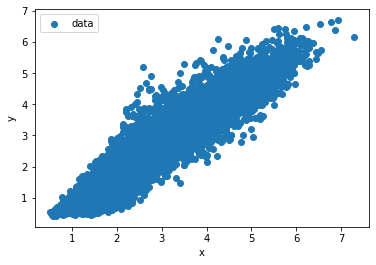

In [28]:
plt.scatter(x, y, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [34]:
class SLRA():
    def __init__(self):
        self.w = tf.Variable(tf.random.uniform([1], dtype=tf.double))
        self.b = tf.Variable(tf.zeros([1], dtype=tf.double))
        self.epochs = 5000
        self.learning_rate = 0.001
        print(self.w, self.b)
        
    def train_batch(self, dataset_batch_x, dataset_batch_y):        
        with tf.GradientTape() as tape:
            hypothesis = dataset_batch_x * self.w + self.b
            loss = tf.reduce_mean(tf.square(hypothesis - dataset_batch_y))
            loss_w, loss_b = tape.gradient(loss, [self.w, self.b])
        self.w.assign_sub(self.learning_rate * loss_w)
        self.b.assign_sub(self.learning_rate * loss_b)
        return loss
            
    def train(self, train_x, train_y):
        dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
        dataset = dataset.shuffle(buffer_size=50).batch(10)
        
        loss_mem = []
        for e in range(self.epochs):
            for each, (x,y) in enumerate(dataset):
                loss = self.train_batch(x, y)
            #print('epoch {0}: loss is {1:.4f}'.format(e, float(loss)))
            loss_mem.append(loss)
        return loss_mem
            
    def test(self, target_x):
        res = target_x * self.w + self.b
        return res
    
    def predict(self, test_x, test_y):
        y_hat = test_x * self.w + self.b
        error = y_hat - test_y
        mse = np.mean(error * error)
        rmse = np.sqrt(mse)
        return rmse

In [ ]:
model = SLRA()
loss_mem = model.train(train_x, train_y)

x_epoch = list(range(len(loss_mem)))

plt.plot(x_epoch, loss_mem)
plt.title('Loss plot')
plt.xlabel('epochs')
plt.ylabel('Loss status')
plt.show()

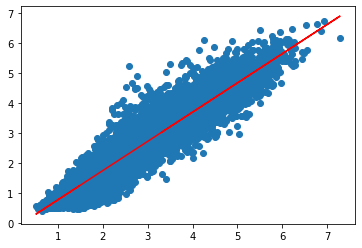

In [31]:
plt.scatter(train_x, train_y)
plt.plot(train_x, model.test(train_x), '-r')
plt.show()

In [33]:
print(model.predict(test_x, test_y))

0.3494439088359718
